# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** [M. Eko Cahyono]
- **Email:** [Muh.ekocahyono45@gmail.com]
- **ID Dicoding:** [M. Eko Cahyono]

## Menentukan Pertanyaan Bisnis



```
# This is formatted as code
```

- Apakah perubahan suhu mampu mempengaruhi jumlah pengguna ?
- Kapan pengguna biasa (casual riders) menggunakan layanan sepeda kita ?

## Import Semua Packages/Library yang Digunakan

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
import scipy as sp


warnings.filterwarnings('ignore')

## Data Wrangling

### Gathering Data

In [ ]:
#Memuat Tabel Day
bikeCycleHour_df = pd.read_csv("https://raw.githubusercontent.com/eko558/Bikecycle_df/main/hour.csv")
bikeCycleHour_df['season'] = bikeCycleHour_df['season'].astype(object)
bikeCycleHour_df.head()

,instant,datetime,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Cleaning Data

**DATA BIKECYCLE HOUR**



In [ ]:
#Menilai bikeCycleHour_df
bikeCycleHour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   datetime    17379 non-null  object 
 2   season      17379 non-null  object 
 3   year        17379 non-null  int64  
 4   month       17379 non-null  int64  
 5   hour        17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weather     17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(11), object(2)
memory usage: 2.3+ MB


In [ ]:
#Tidak terdapat missing value pada tabel bikeCycleHour_df
#Tapi mari kita pastikan kembali dengan kode berikut
bikeCycleHour_df.isna().sum()

instant       0
datetime      0
season        0
year          0
month         0
hour          0
holiday       0
weekday       0
workingday    0
weather       0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [ ]:
#Setelah dua kali pengecekan tidak terdapat missing value
#Tapi, apakah ada data yang terduplikasi pada tabel bikeCycleHour_df
#Mari kita check duplikasinya
print("Jumlah Duplikasi Data : ", bikeCycleHour_df.duplicated().sum())

Jumlah Duplikasi Data :  0


In [ ]:
#Data pada tabel bikeCycleHour_df tidak terdindikasi missing dan duplikasi value,
#maka mari kita lihat ringkasan parameter statistiknya dengan kode berikut
bikeCycleHour_df.describe()

,instant,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**HASIL CLEANING**

Tidak ditemukan missing ataupun duplicated data pada bikeCycleHour_df dan bikeCycleHour_df, sehingga data dilakukan exploratory data pada tahap berikutnya

## Exploratory Data Analysis (EDA)

In [ ]:
bikeCycleHour_df['datetime'] = pd.to_datetime(bikeCycleHour_df['datetime'])
bikeCycleHour_df['month'] = bikeCycleHour_df['datetime'].dt.strftime('%B')
bikeCycleHour_df['year'] = bikeCycleHour_df['datetime'].dt.year
bikeCycleHour_df['month_num'] = bikeCycleHour_df['datetime'].dt.month
bikeCycleHour_df['day number'] = bikeCycleHour_df['datetime'].dt.dayofweek
bikeCycleHour_df['day of week'] = bikeCycleHour_df['datetime'].dt.strftime('%A')
bikeCycleHour_df['total riders'] = bikeCycleHour_df['casual'] + bikeCycleHour_df['registered']

#Kami definisikan musim terlebih dahulu
pembagianMusim = {1: "Winter",
                  2: "Spring",
                  3: "Summer",
                  4: "Fall"}
bikeCycleHour_df['season'] = bikeCycleHour_df['season'].map(pembagianMusim)

bikeCycleHour_df.head()

,instant,datetime,season,year,month,hour,holiday,weekday,workingday,weather,...,atemp,hum,windspeed,casual,registered,cnt,month_num,day number,day of week,total riders
0,1,2011-01-01,Winter,2011,January,0,0,6,0,1,...,0.2879,0.81,0.0,3,13,16,1,5,Saturday,16
1,2,2011-01-01,Winter,2011,January,1,0,6,0,1,...,0.2727,0.80,0.0,8,32,40,1,5,Saturday,40
2,3,2011-01-01,Winter,2011,January,2,0,6,0,1,...,0.2727,0.80,0.0,5,27,32,1,5,Saturday,32
3,4,2011-01-01,Winter,2011,January,3,0,6,0,1,...,0.2879,0.75,0.0,3,10,13,1,5,Saturday,13
4,5,2011-01-01,Winter,2011,January,4,0,6,0,1,...,0.2879,0.75,0.0,0,1,1,1,5,Saturday,1


In [ ]:
#Kami mencari tahu persentasekan jumlah pengguna yang terdaftar
#Rumusnya total pengguna terdaftar / total pengguna
bikeCycleHour_df['registered'].sum()/ bikeCycleHour_df['total riders'].sum()

0.8116983161735475

In [ ]:
#Kami cari tahu apakah terdapat kenaikan pengguna terdaftar disetiap bulannya

bikeCycleHour_df.groupby(['season','month',])['registered'].sum()\
/bikeCycleHour_df.groupby('month')['total riders'].sum()

season  month    
Fall    December     0.724085
        November     0.856364
        October      0.814613
        September    0.226026
Spring  April        0.774049
        June         0.522053
        March        0.303883
        May          0.773023
Summer  August       0.794874
        July         0.773424
        June         0.264556
        September    0.570723
Winter  December     0.173122
        February     0.901138
        January      0.910756
        March        0.501970
dtype: float64

In [ ]:
#kami coba cari tahu berapa besar kenaikan persentasi pengguna per bulannya
bikeCycleHour_df.groupby('month').sum()['total riders']/bikeCycleHour_df['total riders'].sum()*100

month
April         8.172494
August       10.665905
December      6.409249
February      4.596622
January       4.097970
July         10.476211
June         10.518547
March         6.952393
May          10.073439
November      7.739321
October       9.789961
September    10.507887
Name: total riders, dtype: float64

In [ ]:
#Berapa persen kenaikan pengguna casual (sambil lalu)
bikeCycleHour_df.groupby('month').sum()['casual']/bikeCycleHour_df['casual'].sum()*100

month
April         9.806505
August       11.618875
December      3.498775
February      2.413321
January       1.942205
July         12.605622
June         11.919996
March         7.168191
May          12.142409
November      5.903548
October       9.638445
September    11.342108
Name: casual, dtype: float64

In [ ]:
#Lalu berapa persen pengguna sepaeda tiap musimnya
bikeCycleHour_df.groupby(['season']).sum()[['total riders']]/bikeCycleHour_df['total riders'].sum()

,total riders
season,
Fall,0.255601
Spring,0.278979
Summer,0.322269
Winter,0.143150


In [ ]:
#Berapa banyak jumlah pengguna pada hari kerja
bikeCycleHour_df.groupby('workingday').sum()['registered']/bikeCycleHour_df['registered'].sum()

workingday
0    0.255751
1    0.744249
Name: registered, dtype: float64

In [ ]:
#Membuat kolom total pengguna
bikeCycleHour_df = bikeCycleHour_df[bikeCycleHour_df['registered'] >0]
bikeCycleHour_df['total riders'] = bikeCycleHour_df['casual'] + bikeCycleHour_df['registered']
bikeCycleHour_df['hour'] = bikeCycleHour_df['datetime'].dt.hour

In [ ]:
#Membuat rerata bulan serta mengisolasinya dalam format tahun tunggal
bikeCycleHour_df = bikeCycleHour_df[bikeCycleHour_df['year']==2011]
bikeCycleHour_df['mean_month'] = bikeCycleHour_df['month'].map(bikeCycleHour_df.groupby('month')['total riders'].median())

In [ ]:
#Melakukan pengecekan rerata pengguna di setiap bulannya
bikeCycleHour_df.groupby('month')['total riders'].mean()

month
April        132.309623
August       187.246575
December     118.002703
February      74.513138
January       55.744526
July         189.974462
June         199.873259
March         88.569848
May          182.555108
November     142.095967
October      166.232840
September    178.698457
Name: total riders, dtype: float64

In [ ]:
#Menyusun month dictionary agar dapat divisualisasikan
monthDict = []
for i in enumerate(bikeCycleHour_df['month'].unique(),1):
  monthDict.append(i)
monthDict = dict(monthDict)

In [ ]:
bikeCycleHour_df.head()

,instant,datetime,season,year,month,hour,holiday,weekday,workingday,weather,...,hum,windspeed,casual,registered,cnt,month_num,day number,day of week,total riders,mean_month
0,1,2011-01-01,Winter,2011,January,0,0,6,0,1,...,0.81,0.0,3,13,16,1,5,Saturday,16,47.0
1,2,2011-01-01,Winter,2011,January,0,0,6,0,1,...,0.80,0.0,8,32,40,1,5,Saturday,40,47.0
2,3,2011-01-01,Winter,2011,January,0,0,6,0,1,...,0.80,0.0,5,27,32,1,5,Saturday,32,47.0
3,4,2011-01-01,Winter,2011,January,0,0,6,0,1,...,0.75,0.0,3,10,13,1,5,Saturday,13,47.0
4,5,2011-01-01,Winter,2011,January,0,0,6,0,1,...,0.75,0.0,0,1,1,1,5,Saturday,1,47.0


## Visualization & Explanatory Analysis

### Pertanyaan 1: Apakah Perubahan Suhu Mampu Mempengaruhi Jumlah Pengguna ?

Text(0.5, 0.98, 'Distribusi Suhu dan agregasi pengguna')

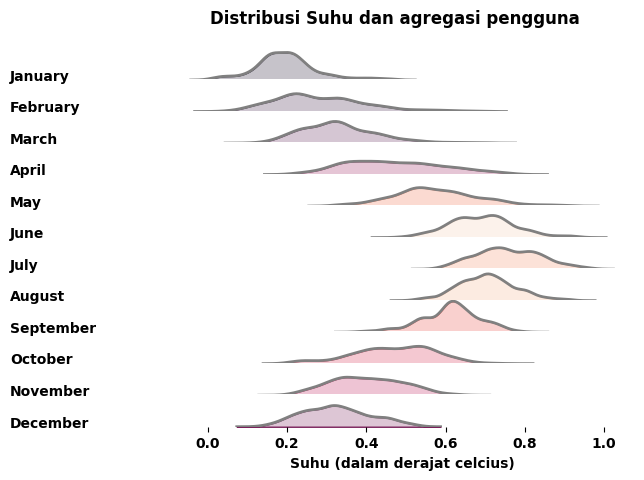

In [ ]:
#Mendefinisikan palet warna terlebih dahulu dengan menggunakan palet warna dari seaborn
warna = sns.color_palette(palette='rocket', n_colors=12)

#Keterangan pada sns facet grid
grid = sns.FacetGrid(bikeCycleHour_df, row='month', aspect=15,height=0.4, hue='mean_month',palette=warna)

#Menambahkan Kdeplots pada tiap bulannya
grid.map(sns.kdeplot, 'temp',fill=True, lw=1)

#Menambahkan grafik linier untuk outlinenya
grid.map(sns.kdeplot, 'temp',lw=2,color='gray')

#kami gunakan facet axis grid dan meletekkan keterangan bulan disebelah kanan
for i, ax in enumerate(grid.axes.flat):
  ax.text(-0.5, 0.02, monthDict[i+1],
          fontweight='bold', fontsize=10)

#Kami melakukan pengaturan pada plots
grid.fig.subplots_adjust(hspace=-0.03)

#Beberapa bagian yang kami hilangkan
grid.set_titles("")
grid.set(yticks=[])
grid.despine(bottom=True, left=True)
grid.set_xlabels("")
grid.set_ylabels("")
plt.setp(ax.get_xticklabels(), fontsize=10, fontweight='bold')
plt.xlabel('Suhu (dalam derajat celcius)', fontsize=10, fontweight='bold')
grid.fig.subplots_adjust(top=0.9)
grid.fig.suptitle('Distribusi Suhu dan agregasi pengguna',fontweight='bold')

Pertanyaan 2: Kapan pengguna biasa (casual riders) menggunakan layanan sepeda kita ?

<Axes: >

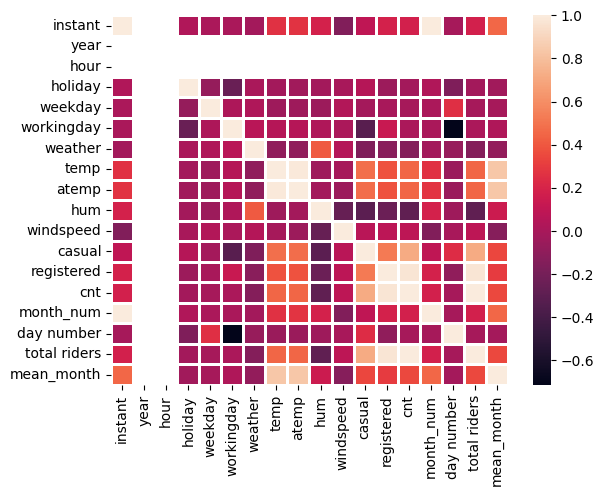

In [ ]:
#Membuat plot korelasi
sns.heatmap(bikeCycleHour_df.corr(),linewidth=1)

Text(0.5, 1.0, 'Overall Correlation')

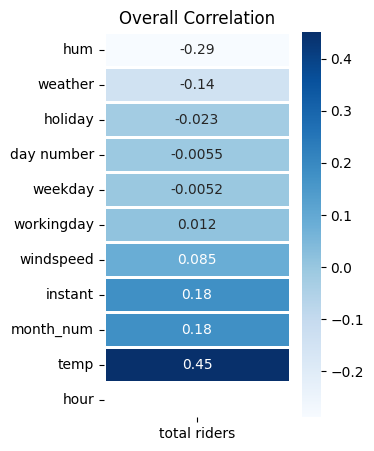

In [ ]:
#mengisolasi korelasi pada pengguna

plt.figure(figsize=(3,5))
sns.heatmap(bikeCycleHour_df.corr()[['total riders']].sort_values(by='total riders')\
            .drop(['total riders',
                   'cnt',
                   'mean_month',
                   'atemp',
                   'registered','casual','year']),linewidths=1,annot=True,
                    cmap='Blues')
plt.title('Overall Correlation')

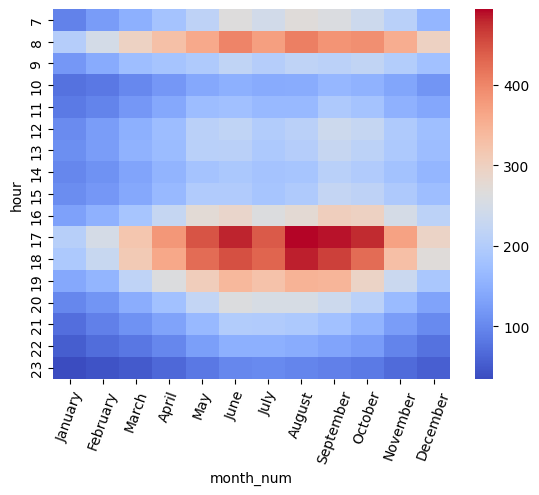

In [ ]:
#Melihat apakah jam mempengaruhi jumlah pengguna
bikeCycleHour_df = pd.read_csv("https://raw.githubusercontent.com/eko558/Bikecycle_df/main/hour.csv")
bikeCycleHour_df['season'] = bikeCycleHour_df['season'].astype(object)
bikeCycleHour_df.head()

bikeCycleHour_df['datetime'] = pd.to_datetime(bikeCycleHour_df['datetime'])
bikeCycleHour_df['month'] = bikeCycleHour_df['datetime'].dt.strftime('%B')
bikeCycleHour_df['year'] = bikeCycleHour_df['datetime'].dt.year
bikeCycleHour_df['month_num'] = bikeCycleHour_df['datetime'].dt.month
bikeCycleHour_df['day number'] = bikeCycleHour_df['datetime'].dt.dayofweek
bikeCycleHour_df['day of week'] = bikeCycleHour_df['datetime'].dt.strftime('%A')
bikeCycleHour_df['total riders'] = bikeCycleHour_df['casual'] + bikeCycleHour_df['registered']

#Kami definisikan musim terlebih dahulu
pembagianMusim = {1: "Winter",
                  2: "Spring",
                  3: "Summer",
                  4: "Fall"}
bikeCycleHour_df['season'] = bikeCycleHour_df['season'].map(pembagianMusim)

bikeCycleHour_df.head()

ax = sns.heatmap(pd.pivot_table(data=bikeCycleHour_df[bikeCycleHour_df['hour']>6],
                                index='hour',
                                columns='month_num',
                                values='registered',
                                aggfunc='mean'),cmap='coolwarm')
ax.set_xticklabels(bikeCycleHour_df.month.unique())
plt.xticks(rotation=70);

Text(0.5, 1.0, 'Pengguna biasa yang memilih layanan di akhir pekan')

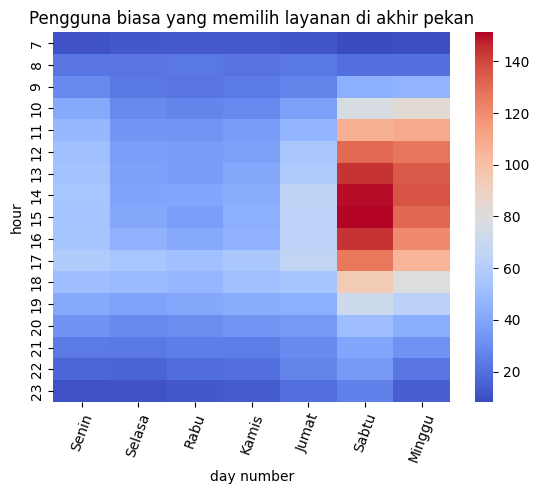

In [ ]:
#Mengetahui jumlah pengguna biasa di akhir pekan
ax = sns.heatmap(pd.pivot_table(data=bikeCycleHour_df[bikeCycleHour_df['hour']>6],
                                index='hour',
                                columns='day number',
                                values='casual',
                                aggfunc='mean'),cmap='coolwarm')
ax.set_xticklabels(['Senin', 'Selasa', 'Rabu', 'Kamis', 'Jumat', 'Sabtu', 'Minggu'])
plt.xticks(rotation=70)
plt.title('Pengguna biasa yang memilih layanan di akhir pekan')

In [ ]:
#Validasi pengguna biasa
bikeCycleHour_df.groupby('day of week').sum()['casual']/bikeCycleHour_df['casual'].sum()

day of week
Friday       0.126187
Monday       0.114165
Saturday     0.248142
Sunday       0.226641
Thursday     0.099126
Tuesday      0.093293
Wednesday    0.092447
Name: casual, dtype: float64

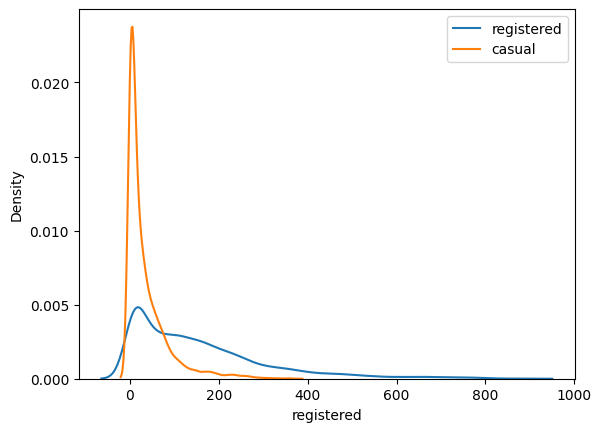

In [ ]:
#Memastikan distribusi berdasarkan jenis pengguna
sns.kdeplot(bikeCycleHour_df['registered'],label='registered')
sns.kdeplot(bikeCycleHour_df['casual'],label='casual')
plt.legend()

In [ ]:
#Membuat Temperature Backet
bikeCycleHour_df['temp Backet'] = pd.qcut(bikeCycleHour_df['temp'],4)
bikeCycleHour_df.head()

,instant,datetime,season,year,month,hour,holiday,weekday,workingday,weather,...,hum,windspeed,casual,registered,cnt,month_num,day number,day of week,total riders,temp Backet
0,1,2011-01-01,Winter,2011,January,0,0,6,0,1,...,0.81,0.0,3,13,16,1,5,Saturday,16,"(0.019, 0.34]"
1,2,2011-01-01,Winter,2011,January,1,0,6,0,1,...,0.80,0.0,8,32,40,1,5,Saturday,40,"(0.019, 0.34]"
2,3,2011-01-01,Winter,2011,January,2,0,6,0,1,...,0.80,0.0,5,27,32,1,5,Saturday,32,"(0.019, 0.34]"
3,4,2011-01-01,Winter,2011,January,3,0,6,0,1,...,0.75,0.0,3,10,13,1,5,Saturday,13,"(0.019, 0.34]"
4,5,2011-01-01,Winter,2011,January,4,0,6,0,1,...,0.75,0.0,0,1,1,1,5,Saturday,1,"(0.019, 0.34]"


In [ ]:
#Mengelompokan tempbucket
bikeCycleHour_df['temp Backet'].value_counts(normalize=True)

(0.5, 0.66]      0.275908
(0.019, 0.34]    0.274469
(0.34, 0.5]      0.235342
(0.66, 1.0]      0.214282
Name: temp Backet, dtype: float64

In [ ]:
#Mengelompokan tem bucket
grouping = bikeCycleHour_df.groupby('temp Backet').mean()[['casual','registered','total riders']]
grouping['Difference'] = grouping['registered']/grouping['casual']
grouping

,casual,registered,total riders,Difference
temp Backet,,,,
"(0.019, 0.34]",8.611530,89.039413,97.650943,10.339557
"(0.34, 0.5]",27.403423,141.551834,168.955257,5.165480
"(0.5, 0.66]",42.438165,171.863608,214.301773,4.049742
"(0.66, 1.0]",70.722073,226.882653,297.604726,3.208088


<Axes: title={'center': 'Perubahan Eksponensial Pada Pengguna Dikarenakan Suhu'}, xlabel='temp Backet', ylabel='Difference'>

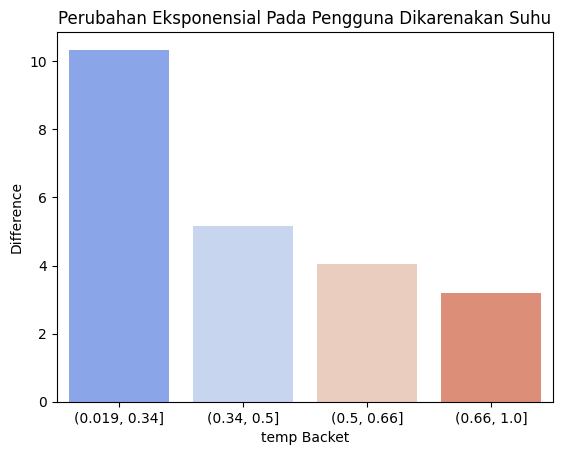

In [ ]:
#Grafis dari grouping
plt.title('Perubahan Eksponensial Pada Pengguna Dikarenakan Suhu')
sns.barplot(data=grouping, x=grouping.index,
            y='Difference',palette='coolwarm')

## Conclusion

**- Conclution pertanyaan 1**

  Perubahan suhu dapat mempengaruhi jumlah pengguna (penyewa) sepeda, dimana berdasarkan grafik suhu dan agregasi pengguna, baik suhu ataupun jumlah pengguna mengalami penurunan seiring datangnya musim dingin (winter)

**Conclution pertanyaan 2**

Berdasarkan grafik Pengguna Biasa yang memilih layanan di akhir pekan, pengguna biasa (casual) paling banyak menggunakan layanan pada hari sabtu pada jam 14.00 hingga 15.00